In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

from scipy import stats

# Data Generation

In [2]:
np.random.seed(6)

east_java_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
east_java_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
east_java_ages = np.concatenate((east_java_ages1, east_java_ages2))
east_java_ages.mean()

40.68

In [3]:
np.random.seed(12)

west_java_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
west_java_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
west_java_ages = np.concatenate((west_java_ages1, west_java_ages2))
west_java_ages.mean()

42.8

In [4]:
pd.DataFrame({
    "East Java Age": east_java_ages,
    "West Java Age": west_java_ages
})

,East Java Age,West Java Age
0,56,44
1,54,47
2,40,60
3,48,65
4,45,47
5,47,52
6,48,56
7,54,56
8,55,44
9,53,48


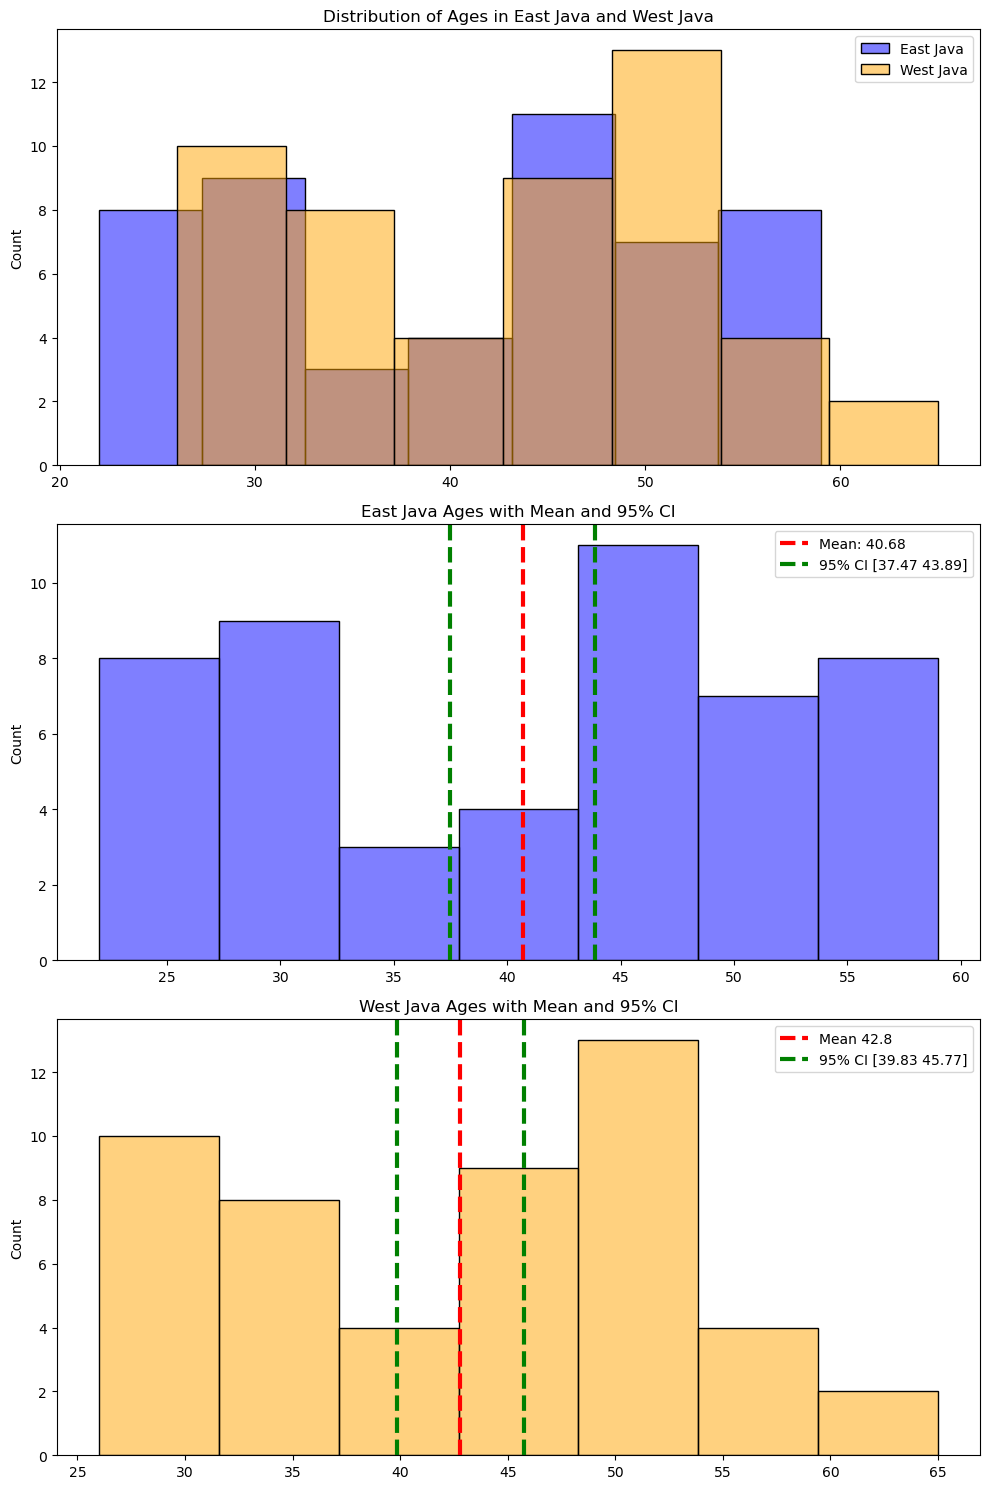

In [5]:
def calculate_ci(data):
    mean = np.mean(data)
    sem = stats.sem(data)
    ci = stats.t.interval(0.95, len(data) - 1, loc=mean, scale=sem)
    return mean, ci

east_mean, east_ci = calculate_ci(east_java_ages)
west_mean, west_ci = calculate_ci(west_java_ages)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

data = [east_java_ages, west_java_ages]
means = [east_mean, west_mean]
cis = [east_ci, west_ci]
titles = ["Distribution of Ages in East Java", "Distribution of Ages in West Java"]
colors = ["blue", "orange"]

sns.histplot(east_java_ages, ax=axes[0], color="blue", label="East Java", alpha=0.5)
sns.histplot(west_java_ages, ax=axes[0], color="orange", label="West Java", alpha=0.5)
axes[0].set_title("Distribution of Ages in East Java and West Java")
axes[0].legend()

sns.histplot(data[0], ax=axes[1], color="blue", alpha=0.5)
axes[1].axvline(means[0], color="red", linestyle="--", linewidth=3, label=f"Mean: {east_mean}")
axes[1].axvline(cis[0][0], color="green", linestyle="--", linewidth=3, label=f"95% CI {np.round(east_ci, 2)}")
axes[1].axvline(cis[0][1], color="green", linestyle="--", linewidth=3)
axes[1].set_title("East Java Ages with Mean and 95% CI")
axes[1].legend(loc="upper right")

sns.histplot(data[1], ax=axes[2], color="orange", alpha=0.5)
axes[2].axvline(means[1], color="red", linestyle="--", linewidth=3, label=f"Mean {west_mean}")
axes[2].axvline(cis[1][0], color="green", linestyle="--", linewidth=3, label=f"95% CI {np.round(west_ci, 2)}")
axes[2].axvline(cis[1][1], color="green", linestyle="--", linewidth=3)
axes[2].set_title("West Java Ages with Mean and 95% CI")
axes[2].legend(loc="upper right")

plt.tight_layout()
plt.show()

# Two-Sample T-Test

## Hypothesis
- Null Hypothesis (H₀): The means of the two populations (East Java ages and West Java ages) are similar.
- Alternative Hypothesis (H₁): The means of the two populations (East Java ages and West Java ages) are different.

## Significance Level (α)
- The significance level (α) is a predetermined threshold used in statistical testing to assess whether the observed data provides enough evidence to reject the null hypothesis. In this case, we chose a significance level of 5% (0.05).
- This means that we allow for a 5% chance of concluding that there is a difference between the means of the two populations when, in fact, there is no difference. In simpler terms, it’s like saying we’re okay with being wrong about 1 out of 20 times.
- Therefore, if our analysis yields a p-value less than or equal to 0.05, it suggests that the observed data is unlikely under the assumption that the null hypothesis is true, prompting us to consider the alternative hypothesis.

## Test Statistic

In [6]:
welch_test_scipy = stats.ttest_ind(east_java_ages, west_java_ages, equal_var=False)
welch_test_scipy

TtestResult(statistic=-0.9745088195709343, pvalue=0.33221768005728836, df=97.41454338473416)

In [7]:
welch_test_pg = pg.ttest(east_java_ages, west_java_ages, correction=False)
welch_test_pg

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.974509,98,two-sided,0.332203,"[-6.44, 2.2]",0.194902,0.321,0.161595


The t-distribution in our case is essentially a model that represents all the possible differences in average ages we might see between East Java and West Java if we were to repeat our study many, many times, assuming there's actually no real difference between the two regions.

- Imagine we could collect thousands of different samples from East Java and West Java and calculate the difference in average age each time.
- If there's truly no difference between the regions, sometimes we'd get a small difference, sometimes a bigger one, just by chance.
- The t-distribution shows how often we'd expect to see each possible difference.
- The middle of the curve (around 0) represents small differences, which we'd see most often.
- The tails of the curve represent larger differences, which we'd see less often.
- Our actual observed difference (-0.974509) is plotted on this distribution to see how likely or unlikely it is, compared to what we'd expect if there was no real difference.

So, in essence, the t-distribution is a theoretical model that helps we judge whether the difference we observed in our study is unusual enough to suggest a real difference between the regions, or if it's within the range of differences we might see just by chance.

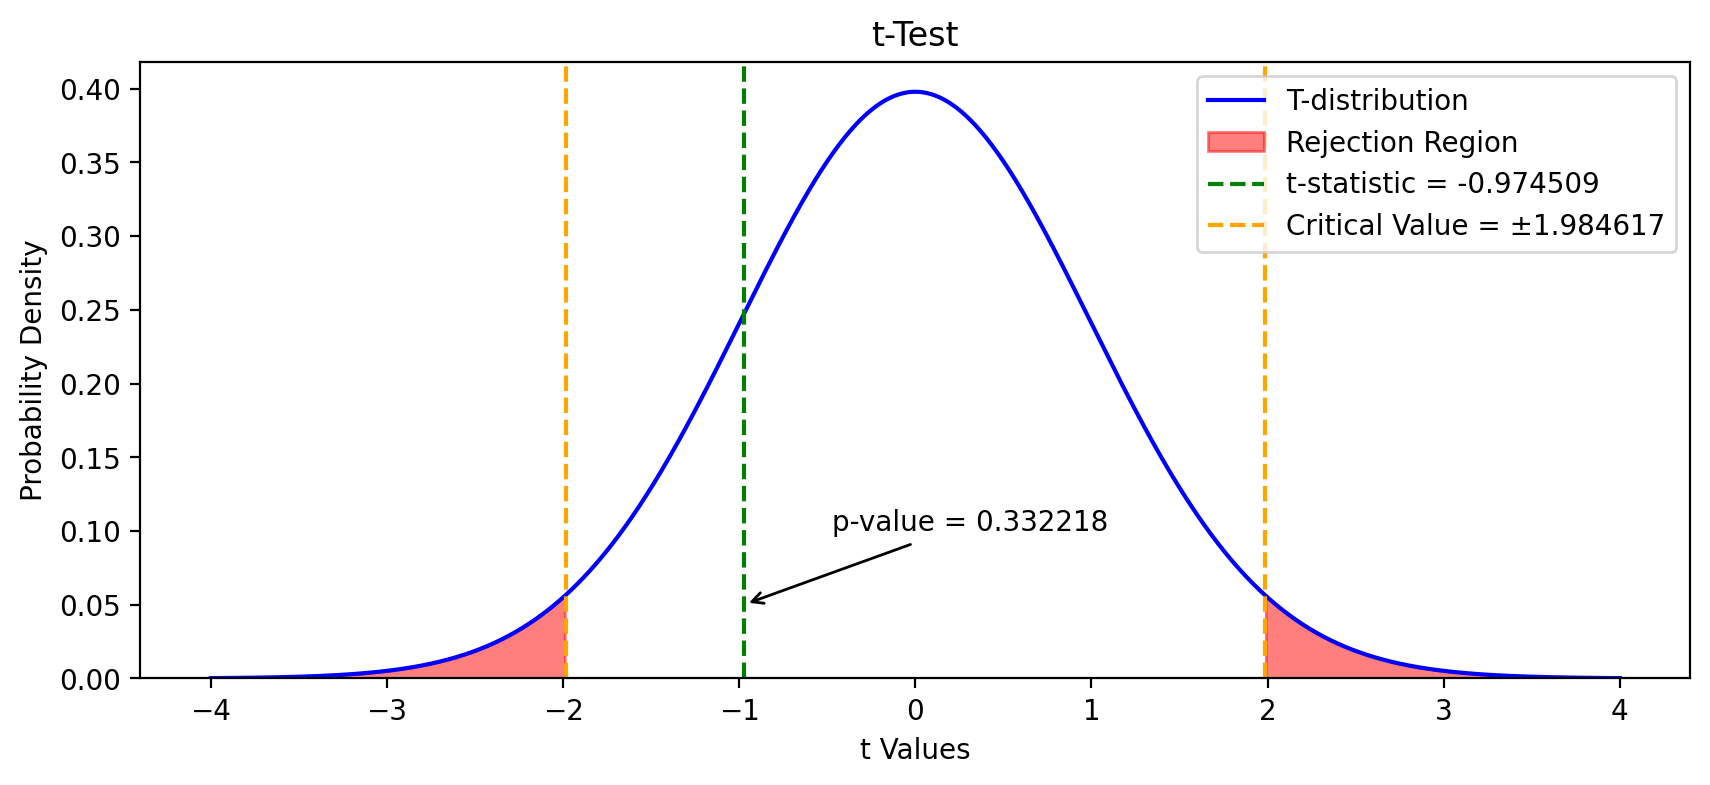

In [8]:
alpha = 0.05
t_values = np.linspace(-4, 4, 1000)
t_dist = stats.t.pdf(t_values, welch_test_scipy.df)

crit_value = stats.t.ppf(1 - (alpha / 2), welch_test_scipy.df)

plt.figure(figsize=(10, 4), dpi=200)

plt.plot(t_values, t_dist, label="T-distribution", color="blue")
plt.fill_between(t_values, 0, t_dist, where=(t_values >= crit_value), color="red", alpha=0.5, label="Rejection Region")
plt.fill_between(t_values, 0, t_dist, where=(t_values <= -crit_value), color="red", alpha=0.5)
plt.axvline(welch_test_scipy.statistic, color="green", linestyle="--", label=f"t-statistic = {welch_test_scipy.statistic:.6f}")
plt.axvline(crit_value, color="orange", linestyle="--", label=f"Critical Value = ±{crit_value:.6f}")
plt.axvline(-crit_value, color="orange", linestyle="--")

plt.title("t-Test")
plt.xlabel("t Values")
plt.ylabel("Probability Density")
plt.ylim(bottom=0)
plt.legend()

plt.annotate(
    f"p-value = {welch_test_scipy.pvalue:.6f}",
    xy=(welch_test_scipy.statistic, 0.05),
    xytext=(welch_test_scipy.statistic + 0.5, 0.1),
    arrowprops=dict(facecolor="black", arrowstyle="->")
)

plt.show()

## Conclusion

Our p-value of 0.332203 is much larger than the common significance level of 0.05. This means:
- There is a 33.2% chance of observing a difference in average ages as large as or larger than the one we found (42.8 - 40.68 = 2.12 years), even if there were no real difference between the two populations.
- This high probability suggests that the observed difference could easily have occurred due to random chance, rather than representing a true difference between the populations.
- Therefore, we fail to reject the null hypothesis. In other words, we don't have sufficient statistical evidence to conclude that there's a significant difference in average ages between East Java and West Java populations.
- Practically speaking, while our sample shows that West Java's average age is about 2.12 years higher than East Java's, this difference is not statistically significant. It could be due to random sampling variation rather than a true difference in the overall populations.

Regarding our t-statistic of -0.974509:
- The t-statistic measures how many standard deviations our sample mean difference is from zero.
- The magnitude of 0.974509 is less than the critical t-value for our chosen significance level (typically around 2 for a 0.05 significance level), which aligns with our p-value interpretation.
- This t-statistic falls within the acceptance region of the t-distribution, meaning it's not extreme enough to reject the null hypothesis.
- In practical terms, our observed difference in means (2.12 years) is less than one standard deviation away from zero, suggesting that this difference is not statistically significant and could easily occur due to random chance.

Both the p-value and t-statistic lead us to the same conclusion: we do not have sufficient evidence to claim a significant difference in average ages between the populations of East Java and West Java.

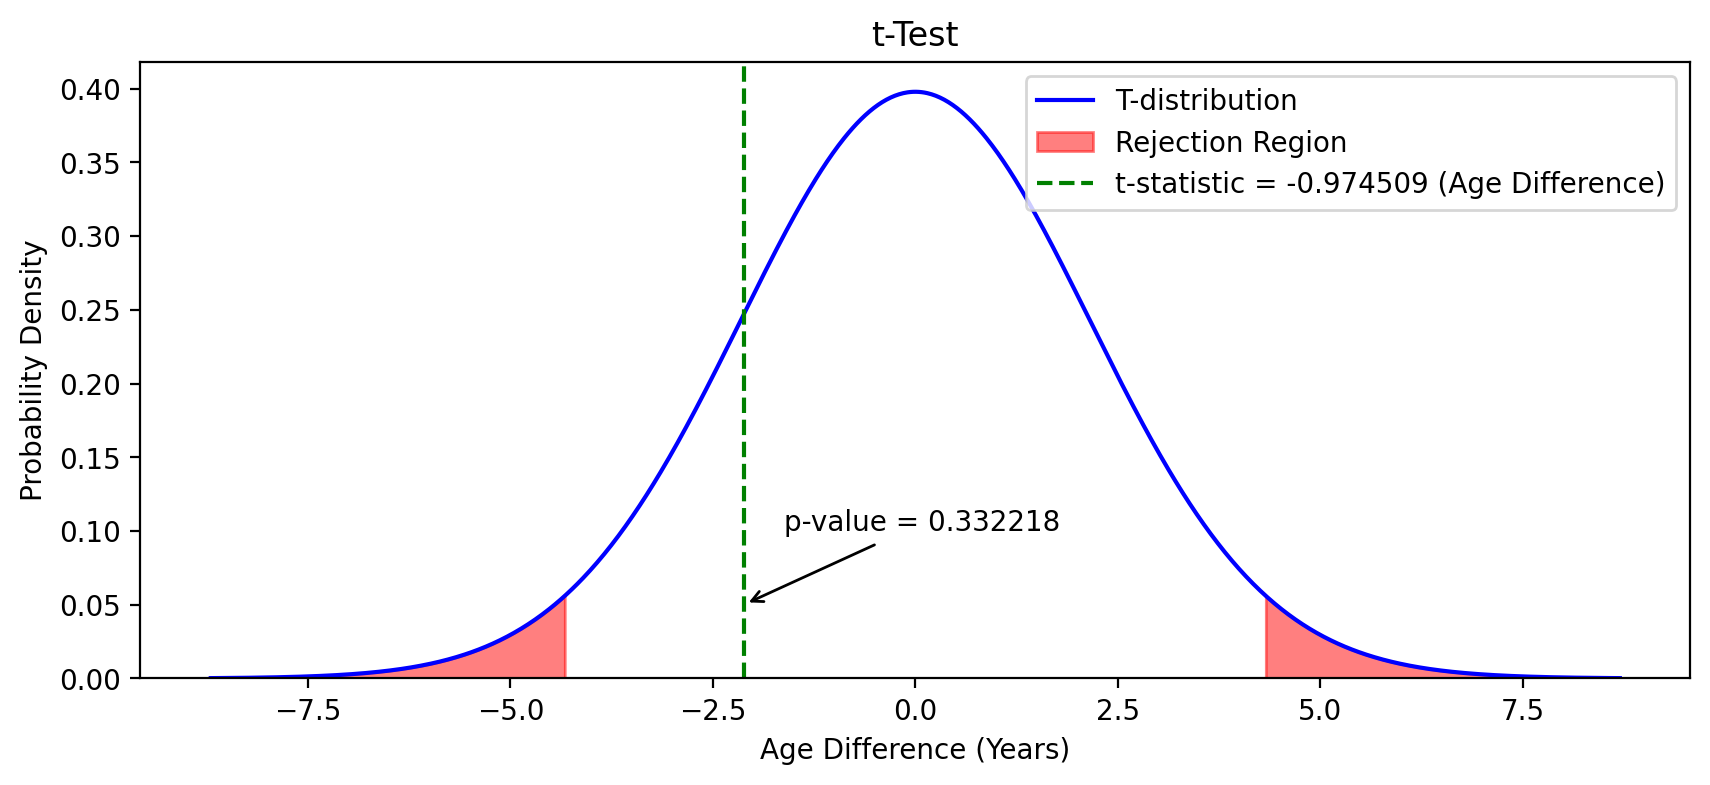

In [9]:
sem_east = stats.sem(east_java_ages)
sem_west = stats.sem(west_java_ages)

SE = np.sqrt(sem_east**2 + sem_west**2)

alpha = 0.05
t_values = np.linspace(-4, 4, 1000)
t_dist = stats.t.pdf(t_values, welch_test_scipy.df)

age_diff_values = t_values * SE

crit_value = stats.t.ppf(1 - (alpha / 2), welch_test_scipy.df)

plt.figure(figsize=(10, 4), dpi=200)
plt.plot(age_diff_values, t_dist, label="T-distribution", color="blue")

plt.fill_between(age_diff_values, 0, t_dist, where=(age_diff_values >= crit_value * SE), color="red", alpha=0.5, label="Rejection Region")
plt.fill_between(age_diff_values, 0, t_dist, where=(age_diff_values <= -crit_value * SE), color="red", alpha=0.5)

plt.axvline(welch_test_scipy.statistic * SE, color="green", linestyle="--", label=f"t-statistic = {welch_test_scipy.statistic:.6f} (Age Difference)")

plt.title("t-Test")
plt.xlabel("Age Difference (Years)")
plt.ylabel("Probability Density")
plt.ylim(bottom=0)
plt.legend()

plt.annotate(
    f"p-value = {welch_test_scipy.pvalue:.6f}",
    xy=(welch_test_scipy.statistic * SE, 0.05),
    xytext=(welch_test_scipy.statistic * SE + 0.5, 0.1),
    arrowprops=dict(facecolor="black", arrowstyle="->")
)

plt.show()